In [2]:
import pandas as pd  #importing pandas libraries
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [62]:
#2021_year_goals
# read the excel
import pandas as pd 
Data_Goals= pd.read_excel("AY_2021_Goals_Output.xlsx", sheet_name="Goals")
Data_Goals 

,Responder_ID,Quarter_Work,College,Major,Cops,Class,Citizenship_Status,Co-op,Co-op_Goals
0,3572,Fall/Winter,B,FIN,4COP,SR,International,First/Only,co-op really helped gain leadership qualities ...
1,3574,Fall/Winter,B,LGST,4COP,SR,Domestic,First/Only,really wanted build network begin solid career...
2,3581,Fall/Winter,B,ACCT,5COP,SR,Domestic,Second,Although see working finance digital future ca...
3,3583,Fall/Winter,B,FIN,5COP,JR,Domestic,Second,previous co-op told need speak learn take char...
4,3584,Fall/Winter,B,INT2,5COP,SR,Domestic,First,never expected job forensic accounting/financi...
...,...,...,...,...,...,...,...,...,...
1337,3548,Spring/Summer,B,FIN,5COP,SO,Domestic,First,eventually would like work fund analyst eventu...
1338,3550,Spring/Summer,B,LGST,5COP,JR,Domestic,First,allowed look subject nonprofit law laws also t...
1339,3555,Spring,B,FIN,5COP,JR,Domestic,First,NaN
1340,3563,Spring/Summer,BE,ECON,5COP,JR,Domestic,First,"great question feel like personal , academic ,..."


In [63]:
import nltk
import ssl
import os
import re
!pip install textblob
!pip install scikit-learn
import pandas as pd
from nltk import sent_tokenize, word_tokenize, WordNetLemmatizer
from textblob import TextBlob #for spelling correction
from nltk.util import ngrams
from collections import Counter
#import ignore_words
from sklearn.feature_extraction.text import CountVectorizer
Data_Goals= pd.read_excel("AY_2021_Goals_Output.xlsx", sheet_name="Goals")
Data_Goals 


,Responder_ID,Quarter_Work,College,Major,Cops,Class,Citizenship_Status,Co-op,Co-op_Goals
0,3572,Fall/Winter,B,FIN,4COP,SR,International,First/Only,co-op really helped gain leadership qualities ...
1,3574,Fall/Winter,B,LGST,4COP,SR,Domestic,First/Only,really wanted build network begin solid career...
2,3581,Fall/Winter,B,ACCT,5COP,SR,Domestic,Second,Although see working finance digital future ca...
3,3583,Fall/Winter,B,FIN,5COP,JR,Domestic,Second,previous co-op told need speak learn take char...
4,3584,Fall/Winter,B,INT2,5COP,SR,Domestic,First,never expected job forensic accounting/financi...
...,...,...,...,...,...,...,...,...,...
1337,3548,Spring/Summer,B,FIN,5COP,SO,Domestic,First,eventually would like work fund analyst eventu...
1338,3550,Spring/Summer,B,LGST,5COP,JR,Domestic,First,allowed look subject nonprofit law laws also t...
1339,3555,Spring,B,FIN,5COP,JR,Domestic,First,NaN
1340,3563,Spring/Summer,BE,ECON,5COP,JR,Domestic,First,"great question feel like personal , academic ,..."


In [64]:
#for ignore_words
from sklearn.feature_extraction.text import CountVectorizer

# read the excel
Data_Goals= pd.read_excel("AY_2021_Goals_Output.xlsx", sheet_name="Goals")
Data_Goals 

,Responder_ID,Quarter_Work,College,Major,Cops,Class,Citizenship_Status,Co-op,Co-op_Goals
0,3572,Fall/Winter,B,FIN,4COP,SR,International,First/Only,co-op really helped gain leadership qualities ...
1,3574,Fall/Winter,B,LGST,4COP,SR,Domestic,First/Only,really wanted build network begin solid career...
2,3581,Fall/Winter,B,ACCT,5COP,SR,Domestic,Second,Although see working finance digital future ca...
3,3583,Fall/Winter,B,FIN,5COP,JR,Domestic,Second,previous co-op told need speak learn take char...
4,3584,Fall/Winter,B,INT2,5COP,SR,Domestic,First,never expected job forensic accounting/financi...
...,...,...,...,...,...,...,...,...,...
1337,3548,Spring/Summer,B,FIN,5COP,SO,Domestic,First,eventually would like work fund analyst eventu...
1338,3550,Spring/Summer,B,LGST,5COP,JR,Domestic,First,allowed look subject nonprofit law laws also t...
1339,3555,Spring,B,FIN,5COP,JR,Domestic,First,NaN
1340,3563,Spring/Summer,BE,ECON,5COP,JR,Domestic,First,"great question feel like personal , academic ,..."


In [65]:
#to check for empty columns
Data_Goals.isnull().sum()

Responder_ID          0
Quarter_Work          0
College               0
Major                 0
Cops                  0
Class                 0
Citizenship_Status    0
Co-op                 0
Co-op_Goals           9
dtype: int64

In [66]:
Data_Goals= Data_Goals.dropna()
#check again for results
Data_Goals.isnull().sum()

Responder_ID          0
Quarter_Work          0
College               0
Major                 0
Cops                  0
Class                 0
Citizenship_Status    0
Co-op                 0
Co-op_Goals           0
dtype: int64

In [67]:
# Assuming Data_Goals is your DataFrame
Data_Goals = Data_Goals.copy()

# Convert 'Co-op_Goals' to lowercase and assign it to 'My_Goals'
Data_Goals['My_Goals'] = Data_Goals['Co-op_Goals'].astype(str).str.lower()
Data_Goals

,Responder_ID,Quarter_Work,College,Major,Cops,Class,Citizenship_Status,Co-op,Co-op_Goals,My_Goals
0,3572,Fall/Winter,B,FIN,4COP,SR,International,First/Only,co-op really helped gain leadership qualities ...,co-op really helped gain leadership qualities ...
1,3574,Fall/Winter,B,LGST,4COP,SR,Domestic,First/Only,really wanted build network begin solid career...,really wanted build network begin solid career...
2,3581,Fall/Winter,B,ACCT,5COP,SR,Domestic,Second,Although see working finance digital future ca...,although see working finance digital future ca...
3,3583,Fall/Winter,B,FIN,5COP,JR,Domestic,Second,previous co-op told need speak learn take char...,previous co-op told need speak learn take char...
4,3584,Fall/Winter,B,INT2,5COP,SR,Domestic,First,never expected job forensic accounting/financi...,never expected job forensic accounting/financi...
...,...,...,...,...,...,...,...,...,...,...
1336,3541,Spring/Summer,BE,ECON,5COP,JR,International,First,"big part co-op experience research , included ...","big part co-op experience research , included ..."
1337,3548,Spring/Summer,B,FIN,5COP,SO,Domestic,First,eventually would like work fund analyst eventu...,eventually would like work fund analyst eventu...
1338,3550,Spring/Summer,B,LGST,5COP,JR,Domestic,First,allowed look subject nonprofit law laws also t...,allowed look subject nonprofit law laws also t...
1340,3563,Spring/Summer,BE,ECON,5COP,JR,Domestic,First,"great question feel like personal , academic ,...","great question feel like personal , academic ,..."


In [51]:
#remove contractions

!pip install contractions


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\vishn\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [68]:
import contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions.contractions_dict.keys()))
contractions.contractions_dict.keys()

Def_Con = contractions.contractions_dict
def update_text(text):
    for key in Def_Con:
        text = re.sub(key, Def_Con[key], text)
    return text

def expand_contractions(text,contractions_dict=contractions.contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

Data_Goals['My_Goals'] = Data_Goals['Co-op_Goals'].apply(lambda x: update_text(x))
Data_Goals

,Responder_ID,Quarter_Work,College,Major,Cops,Class,Citizenship_Status,Co-op,Co-op_Goals,My_Goals
0,3572,Fall/Winter,B,FIN,4COP,SR,International,First/Only,co-op really helped gain leadership qualities ...,co-op really helped gain leadership qualities ...
1,3574,Fall/Winter,B,LGST,4COP,SR,Domestic,First/Only,really wanted build network begin solid career...,really wanted build network begin solid career...
2,3581,Fall/Winter,B,ACCT,5COP,SR,Domestic,Second,Although see working finance digital future ca...,Although see working finance digital future ca...
3,3583,Fall/Winter,B,FIN,5COP,JR,Domestic,Second,previous co-op told need speak learn take char...,previous co-op told need speak learn take char...
4,3584,Fall/Winter,B,INT2,5COP,SR,Domestic,First,never expected job forensic accounting/financi...,never expected job forensic accounting/financi...
...,...,...,...,...,...,...,...,...,...,...
1336,3541,Spring/Summer,BE,ECON,5COP,JR,International,First,"big part co-op experience research , included ...","big part co-op experience research , included ..."
1337,3548,Spring/Summer,B,FIN,5COP,SO,Domestic,First,eventually would like work fund analyst eventu...,eventually would like work fund analyst eventu...
1338,3550,Spring/Summer,B,LGST,5COP,JR,Domestic,First,allowed look subject nonprofit law laws also t...,allowed look subject nonprofit law laws also t...
1340,3563,Spring/Summer,BE,ECON,5COP,JR,Domestic,First,"great question feel like personal , academic ,...","great question feel like personal , academic ,..."


In [69]:
#remove other special characters
Data_Goals['My_Goals']=Data_Goals['My_Goals'].apply(lambda x: re.sub('[^A-Za-z0-9]+', ' ', str(x)))
Data_Goals['My_Goals']

0       co op really helped gain leadership qualities ...
1       really wanted build network begin solid career...
2       Although see working finance digital future ca...
3       previous co op told need speak learn take char...
4       never expected job forensic accounting financi...
                              ...                        
1336    big part co op experience research included th...
1337    eventually would like work fund analyst eventu...
1338    allowed look subject nonprofit law laws also t...
1340    great question feel like personal academic pro...
1341    co op really opened eyes different aspects mar...
Name: My_Goals, Length: 1333, dtype: object

In [70]:
#removing all digits from the data
Data_Goals['My_Goals']=Data_Goals['My_Goals'].apply(lambda x: re.sub('\w*\d\w*','', str(x)))
Data_Goals['My_Goals']

0       co op really helped gain leadership qualities ...
1       really wanted build network begin solid career...
2       Although see working finance digital future ca...
3       previous co op told need speak learn take char...
4       never expected job forensic accounting financi...
                              ...                        
1336    big part co op experience research included th...
1337    eventually would like work fund analyst eventu...
1338    allowed look subject nonprofit law laws also t...
1340    great question feel like personal academic pro...
1341    co op really opened eyes different aspects mar...
Name: My_Goals, Length: 1333, dtype: object

In [71]:
Data_Goals

,Responder_ID,Quarter_Work,College,Major,Cops,Class,Citizenship_Status,Co-op,Co-op_Goals,My_Goals
0,3572,Fall/Winter,B,FIN,4COP,SR,International,First/Only,co-op really helped gain leadership qualities ...,co op really helped gain leadership qualities ...
1,3574,Fall/Winter,B,LGST,4COP,SR,Domestic,First/Only,really wanted build network begin solid career...,really wanted build network begin solid career...
2,3581,Fall/Winter,B,ACCT,5COP,SR,Domestic,Second,Although see working finance digital future ca...,Although see working finance digital future ca...
3,3583,Fall/Winter,B,FIN,5COP,JR,Domestic,Second,previous co-op told need speak learn take char...,previous co op told need speak learn take char...
4,3584,Fall/Winter,B,INT2,5COP,SR,Domestic,First,never expected job forensic accounting/financi...,never expected job forensic accounting financi...
...,...,...,...,...,...,...,...,...,...,...
1336,3541,Spring/Summer,BE,ECON,5COP,JR,International,First,"big part co-op experience research , included ...",big part co op experience research included th...
1337,3548,Spring/Summer,B,FIN,5COP,SO,Domestic,First,eventually would like work fund analyst eventu...,eventually would like work fund analyst eventu...
1338,3550,Spring/Summer,B,LGST,5COP,JR,Domestic,First,allowed look subject nonprofit law laws also t...,allowed look subject nonprofit law laws also t...
1340,3563,Spring/Summer,BE,ECON,5COP,JR,Domestic,First,"great question feel like personal , academic ,...",great question feel like personal academic pro...


In [72]:
import string  #removing punctuation marks
for character in string.punctuation:
    Data_Goals['My_Goals']=Data_Goals['My_Goals'].replace(character, '')
Data_Goals

,Responder_ID,Quarter_Work,College,Major,Cops,Class,Citizenship_Status,Co-op,Co-op_Goals,My_Goals
0,3572,Fall/Winter,B,FIN,4COP,SR,International,First/Only,co-op really helped gain leadership qualities ...,co op really helped gain leadership qualities ...
1,3574,Fall/Winter,B,LGST,4COP,SR,Domestic,First/Only,really wanted build network begin solid career...,really wanted build network begin solid career...
2,3581,Fall/Winter,B,ACCT,5COP,SR,Domestic,Second,Although see working finance digital future ca...,Although see working finance digital future ca...
3,3583,Fall/Winter,B,FIN,5COP,JR,Domestic,Second,previous co-op told need speak learn take char...,previous co op told need speak learn take char...
4,3584,Fall/Winter,B,INT2,5COP,SR,Domestic,First,never expected job forensic accounting/financi...,never expected job forensic accounting financi...
...,...,...,...,...,...,...,...,...,...,...
1336,3541,Spring/Summer,BE,ECON,5COP,JR,International,First,"big part co-op experience research , included ...",big part co op experience research included th...
1337,3548,Spring/Summer,B,FIN,5COP,SO,Domestic,First,eventually would like work fund analyst eventu...,eventually would like work fund analyst eventu...
1338,3550,Spring/Summer,B,LGST,5COP,JR,Domestic,First,allowed look subject nonprofit law laws also t...,allowed look subject nonprofit law laws also t...
1340,3563,Spring/Summer,BE,ECON,5COP,JR,Domestic,First,"great question feel like personal , academic ,...",great question feel like personal academic pro...


In [73]:
import nltk
nltk.download('punkt')
#Generate token based on white space
Data_Goals['My_Goals']= Data_Goals['My_Goals'].apply(word_tokenize)
Data_Goals

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Responder_ID,Quarter_Work,College,Major,Cops,Class,Citizenship_Status,Co-op,Co-op_Goals,My_Goals
0,3572,Fall/Winter,B,FIN,4COP,SR,International,First/Only,co-op really helped gain leadership qualities ...,"[co, op, really, helped, gain, leadership, qua..."
1,3574,Fall/Winter,B,LGST,4COP,SR,Domestic,First/Only,really wanted build network begin solid career...,"[really, wanted, build, network, begin, solid,..."
2,3581,Fall/Winter,B,ACCT,5COP,SR,Domestic,Second,Although see working finance digital future ca...,"[Although, see, working, finance, digital, fut..."
3,3583,Fall/Winter,B,FIN,5COP,JR,Domestic,Second,previous co-op told need speak learn take char...,"[previous, co, op, told, need, speak, learn, t..."
4,3584,Fall/Winter,B,INT2,5COP,SR,Domestic,First,never expected job forensic accounting/financi...,"[never, expected, job, forensic, accounting, f..."
...,...,...,...,...,...,...,...,...,...,...
1336,3541,Spring/Summer,BE,ECON,5COP,JR,International,First,"big part co-op experience research , included ...","[big, part, co, op, experience, research, incl..."
1337,3548,Spring/Summer,B,FIN,5COP,SO,Domestic,First,eventually would like work fund analyst eventu...,"[eventually, would, like, work, fund, analyst,..."
1338,3550,Spring/Summer,B,LGST,5COP,JR,Domestic,First,allowed look subject nonprofit law laws also t...,"[allowed, look, subject, nonprofit, law, laws,..."
1340,3563,Spring/Summer,BE,ECON,5COP,JR,Domestic,First,"great question feel like personal , academic ,...","[great, question, feel, like, personal, academ..."


In [75]:
#remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words("english")
print(stopwords)

Data_Goals

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Responder_ID,Quarter_Work,College,Major,Cops,Class,Citizenship_Status,Co-op,Co-op_Goals,My_Goals
0,3572,Fall/Winter,B,FIN,4COP,SR,International,First/Only,co-op really helped gain leadership qualities ...,"[co, op, really, helped, gain, leadership, qua..."
1,3574,Fall/Winter,B,LGST,4COP,SR,Domestic,First/Only,really wanted build network begin solid career...,"[really, wanted, build, network, begin, solid,..."
2,3581,Fall/Winter,B,ACCT,5COP,SR,Domestic,Second,Although see working finance digital future ca...,"[Although, see, working, finance, digital, fut..."
3,3583,Fall/Winter,B,FIN,5COP,JR,Domestic,Second,previous co-op told need speak learn take char...,"[previous, co, op, told, need, speak, learn, t..."
4,3584,Fall/Winter,B,INT2,5COP,SR,Domestic,First,never expected job forensic accounting/financi...,"[never, expected, job, forensic, accounting, f..."
...,...,...,...,...,...,...,...,...,...,...
1336,3541,Spring/Summer,BE,ECON,5COP,JR,International,First,"big part co-op experience research , included ...","[big, part, co, op, experience, research, incl..."
1337,3548,Spring/Summer,B,FIN,5COP,SO,Domestic,First,eventually would like work fund analyst eventu...,"[eventually, would, like, work, fund, analyst,..."
1338,3550,Spring/Summer,B,LGST,5COP,JR,Domestic,First,allowed look subject nonprofit law laws also t...,"[allowed, look, subject, nonprofit, law, laws,..."
1340,3563,Spring/Summer,BE,ECON,5COP,JR,Domestic,First,"great question feel like personal , academic ,...","[great, question, feel, like, personal, academ..."


In [76]:
# Generate own list of words to be ignored
my_ignore_words_Goals = ['I','This','An','Ever','Like','like','since','get','one','opened','ask','long','skills','academic','made','realize','also','gave','one','relates','comfort','one','helped', 'begin', 'working','times', 'told','need', 'waiting', 'expected', 'allowed', 'law', 'laws', 'wanted', 'eyes','full','would' ,'role', 'real','world','workers','work','lot','able','give', 'coop', 'drexel', 'through', 'n t', 'enjoy', 'may','co','op', 'felt','always','order', 'put','day','various', 'try', 'graduate','others','definitely', 'path', 'mostly','well','task','good','although','allow','still','organization','even','go','personal','goal','able','learn','part','person','thing','consider','job','knowledge','data','first','major','hope','think','coop','find','another','manager','client','look','grow','complete','want','work','area','graduation','choose','best','goal','mine','whether','everything','although','continue','job','new','aspect','co','overall','hope','gain','believe','life','interest','idea','great','information','withinend','operation','specific','side','program','value','sport','understand','say','one op','tax','bring','worker','lead','much','never','relate','sucessful','op','come','research','way','skill','help','student','especially','within','learnlot','present','present','work','bas','level','multiple','relate','month','end','position','possible','run','nand','take','place','year','oppurtunity','connection','job','love','product','start','come','within','way','taugustt','feel','insight','study','large','insight','set','gain','speak','aspect','use','apply','meet','make','really','career','though','think','gain','pursue','thing','last','different','good','world','see','firm','environment','confidence','change','internship','something','allow','start','employee','last','sport','whole','big','relate','go','important','become','find','people','leave','marchet','think','though','experience relate','valuable','prepare','aspect','course','sale','push','truly','field','job','expose','school','see','throughout','task','back','ability','see','account','everyone','understand','truly','leave','big','relate','use','look','team','complete','happy','support','many','different','make','sure','achieve','industry','lot','amount','throughout','group','allow','account','position','happy','next','manage','hard','high','enjoy','one goal','expose','two','many kind','bos','set','exposure','good','show','helpful','class','enjoy','department','focus','previous','know','come','enjoy','class','member','give','understand','call','event','job','glad','aspect','go','plan','complete','along','provide','build','show','real','comfortable','real','come','class','create','see','take','start','experience','help','workplace','ops','would,like','interview','task','complete','big','prepare','chance','extremely','remote','set']
my_ignore_words_Goals

['I',
 'This',
 'An',
 'Ever',
 'Like',
 'like',
 'since',
 'get',
 'one',
 'opened',
 'ask',
 'long',
 'skills',
 'academic',
 'made',
 'realize',
 'also',
 'gave',
 'one',
 'relates',
 'comfort',
 'one',
 'helped',
 'begin',
 'working',
 'times',
 'told',
 'need',
 'waiting',
 'expected',
 'allowed',
 'law',
 'laws',
 'wanted',
 'eyes',
 'full',
 'would',
 'role',
 'real',
 'world',
 'workers',
 'work',
 'lot',
 'able',
 'give',
 'coop',
 'drexel',
 'through',
 'n t',
 'enjoy',
 'may',
 'co',
 'op',
 'felt',
 'always',
 'order',
 'put',
 'day',
 'various',
 'try',
 'graduate',
 'others',
 'definitely',
 'path',
 'mostly',
 'well',
 'task',
 'good',
 'although',
 'allow',
 'still',
 'organization',
 'even',
 'go',
 'personal',
 'goal',
 'able',
 'learn',
 'part',
 'person',
 'thing',
 'consider',
 'job',
 'knowledge',
 'data',
 'first',
 'major',
 'hope',
 'think',
 'coop',
 'find',
 'another',
 'manager',
 'client',
 'look',
 'grow',
 'complete',
 'want',
 'work',
 'area',
 'graduati

In [77]:
Data_Goals['My_Goals']= Data_Goals['My_Goals'].apply(lambda x: [item for item in x if item not in stopwords])
Data_Goals['My_Goals']= Data_Goals['My_Goals'].apply(lambda x: [item for item in x if item not in my_ignore_words_Goals])
Data_Goals['My_Goals']

0       [leadership, qualities, effectively, efficient...
1       [network, solid, senior, intentional, using, c...
2       [Although, finance, digital, future, pick, pro...
3       [charge, background, things, handed, proactive...
4       [forensic, accounting, financial, investigatio...
                              ...                        
1336    [included, thinking, companies, target, findin...
1337    [eventually, fund, analyst, eventually, portfo...
1338    [subject, nonprofit, touched, estate, showed, ...
1340    [question, professional, goals, blend, melting...
1341    [aspects, marcheting, social, media, n, Althou...
Name: My_Goals, Length: 1333, dtype: object

'helped', 'begin', 'working','times', 'told','need', 'waiting', 'expected', 'allowed', 'law', 'laws', 'wanted', 'eyes',

In [78]:
#concatenating the words in the last column into a string
Data_Goals['My_Goals']= Data_Goals['My_Goals'].apply(lambda x: ' '.join([item for item in x]))
Data_Goals

,Responder_ID,Quarter_Work,College,Major,Cops,Class,Citizenship_Status,Co-op,Co-op_Goals,My_Goals
0,3572,Fall/Winter,B,FIN,4COP,SR,International,First/Only,co-op really helped gain leadership qualities ...,leadership qualities effectively efficiently f...
1,3574,Fall/Winter,B,LGST,4COP,SR,Domestic,First/Only,really wanted build network begin solid career...,network solid senior intentional using company...
2,3581,Fall/Winter,B,ACCT,5COP,SR,Domestic,Second,Although see working finance digital future ca...,Although finance digital future pick professio...
3,3583,Fall/Winter,B,FIN,5COP,JR,Domestic,Second,previous co-op told need speak learn take char...,charge background things handed proactive comm...
4,3584,Fall/Winter,B,INT2,5COP,SR,Domestic,First,never expected job forensic accounting/financi...,forensic accounting financial investigations c...
...,...,...,...,...,...,...,...,...,...,...
1336,3541,Spring/Summer,BE,ECON,5COP,JR,International,First,"big part co-op experience research , included ...",included thinking companies target finding com...
1337,3548,Spring/Summer,B,FIN,5COP,SO,Domestic,First,eventually would like work fund analyst eventu...,eventually fund analyst eventually portfolio a...
1338,3550,Spring/Summer,B,LGST,5COP,JR,Domestic,First,allowed look subject nonprofit law laws also t...,subject nonprofit touched estate showed varyin...
1340,3563,Spring/Summer,BE,ECON,5COP,JR,Domestic,First,"great question feel like personal , academic ,...",question professional goals blend melting pot ...


In [79]:
#joing the words in rows in a single string
Goal_words = ' '.join([word for word in Data_Goals['My_Goals']])
Goal_words

'leadership qualities effectively efficiently fast paced ready works network solid senior intentional using company dynamic room growth LeBow business groups speaking experiences using perform highly regarded employers organizational system intellectual property transform future activations fulling requests easier supervise neighboring purview students almost shocked freedom employers trust Trust gained Drexel tasks Although finance digital future pick professional goals time Chubb Chubb worked private smaller companies public bigger company keep busy culture livelier started questioning CPA exam networking company talking often CPA little bit longer extra credits qualify sit Chubb recent graduates called CAP Chubb Associate Program graduating discussed option looks could interested rotational Chubb accounting ending final capstone project seems step professionally obtaining undergraduate degree Chubb reimburse CPA materials exams accepted atmosphere Chubb company operates CAP public C

In [80]:
# Tokenize the string Goals_all_words
Goal_string_tokens= word_tokenize(Goal_words)

# Remove non alpha words
Goal_string_tokens = [word for word in Goal_string_tokens if word.isalpha()]

Goal_string_tokens

['leadership',
 'qualities',
 'effectively',
 'efficiently',
 'fast',
 'paced',
 'ready',
 'works',
 'network',
 'solid',
 'senior',
 'intentional',
 'using',
 'company',
 'dynamic',
 'room',
 'growth',
 'LeBow',
 'business',
 'groups',
 'speaking',
 'experiences',
 'using',
 'perform',
 'highly',
 'regarded',
 'employers',
 'organizational',
 'system',
 'intellectual',
 'property',
 'transform',
 'future',
 'activations',
 'fulling',
 'requests',
 'easier',
 'supervise',
 'neighboring',
 'purview',
 'students',
 'almost',
 'shocked',
 'freedom',
 'employers',
 'trust',
 'Trust',
 'gained',
 'Drexel',
 'tasks',
 'Although',
 'finance',
 'digital',
 'future',
 'pick',
 'professional',
 'goals',
 'time',
 'Chubb',
 'Chubb',
 'worked',
 'private',
 'smaller',
 'companies',
 'public',
 'bigger',
 'company',
 'keep',
 'busy',
 'culture',
 'livelier',
 'started',
 'questioning',
 'CPA',
 'exam',
 'networking',
 'company',
 'talking',
 'often',
 'CPA',
 'little',
 'bit',
 'longer',
 'extra',


In [81]:
import re

Goal_string_tokens= re.sub(r'[^a-zA-Z0-9]', ' ',Goal_words)
Goal_string_tokens = Goal_string_tokens.replace('   ' , '')
Goal_string_tokens = Goal_string_tokens.replace('  ' , '')
Goal_string_tokens= Goal_string_tokens.replace('x000dx000d','')
Goal_string_tokens= Goal_string_tokens.replace('x000d','')
Goal_string_tokens= Goal_string_tokens.replace('j p','jp')
Goal_string_tokens= Goal_string_tokens.replace('x x','')
Goal_string_tokens= Goal_string_tokens.replace('marcheting','Marketing')

Goal_string_tokens= re.sub(r'[^a-zA-Z0-9]', ' ',Goal_words)
Goal_string_tokens = Goal_string_tokens.replace('   ' , '')
Goal_string_tokens = Goal_string_tokens.replace('  ' , '')
Goal_string_tokens= Goal_string_tokens.replace('x000dx000d','')
Goal_string_tokens= Goal_string_tokens.replace('x000d','')
Goal_string_tokens= Goal_string_tokens.replace('j p','jp')
Goal_string_tokens= Goal_string_tokens.replace('x x','')
Goal_string_tokens= Goal_string_tokens.replace('co,op','')
Goal_string_tokens= Goal_string_tokens.replace('co op','')
Goal_string_tokens= Goal_string_tokens.replace('marchet','marketing')
Goal_string_tokens= Goal_string_tokens.replace('x,x','')

Goal_string_tokens= Goal_string_tokens.replace('full','')
Goal_string_tokens


'leadership qualities effectively efficiently fast paced ready works network solid senior intentional using company dynamic room growth LeBow business groups speaking experiences using perform highly regarded employers organizational system intellectual property transform future activations ing requests easier supervise neighboring purview students almost shocked freedom employers trust Trust gained Drexel tasks Although finance digital future pick professional goals time Chubb Chubb worked private smaller companies public bigger company keep busy culture livelier started questioning CPA exam networking company talking often CPA little bit longer extra credits qualify sit Chubb recent graduates called CAP Chubb Associate Program graduating discussed option looks could interested rotational Chubb accounting ending final capstone project seems step professionally obtaining undergraduate degree Chubb reimburse CPA materials exams accepted atmosphere Chubb company operates CAP public CPA c

In [82]:
# Tokenize the string Goals_all_words
Goal_string_tokens = word_tokenize(Goal_string_tokens)

Goal_string_tokens

['leadership',
 'qualities',
 'effectively',
 'efficiently',
 'fast',
 'paced',
 'ready',
 'works',
 'network',
 'solid',
 'senior',
 'intentional',
 'using',
 'company',
 'dynamic',
 'room',
 'growth',
 'LeBow',
 'business',
 'groups',
 'speaking',
 'experiences',
 'using',
 'perform',
 'highly',
 'regarded',
 'employers',
 'organizational',
 'system',
 'intellectual',
 'property',
 'transform',
 'future',
 'activations',
 'ing',
 'requests',
 'easier',
 'supervise',
 'neighboring',
 'purview',
 'students',
 'almost',
 'shocked',
 'freedom',
 'employers',
 'trust',
 'Trust',
 'gained',
 'Drexel',
 'tasks',
 'Although',
 'finance',
 'digital',
 'future',
 'pick',
 'professional',
 'goals',
 'time',
 'Chubb',
 'Chubb',
 'worked',
 'private',
 'smaller',
 'companies',
 'public',
 'bigger',
 'company',
 'keep',
 'busy',
 'culture',
 'livelier',
 'started',
 'questioning',
 'CPA',
 'exam',
 'networking',
 'company',
 'talking',
 'often',
 'CPA',
 'little',
 'bit',
 'longer',
 'extra',
 'cr

In [83]:
#Lemmetization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
Goal_string_tokens = [lemma.lemmatize(word, pos = "n") for word in Goal_string_tokens]
Goal_string_tokens = [lemma.lemmatize(word, pos = "a") for word in Goal_string_tokens]
Goal_string_tokens = [lemma.lemmatize(word, pos = "v") for word in Goal_string_tokens]
Goal_string_tokens= [lemma.lemmatize(word, pos = "r") for word in Goal_string_tokens]
Goal_string_tokens= [lemma.lemmatize(word, pos = "s") for word in Goal_string_tokens]
Goal_string_tokens

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['leadership',
 'quality',
 'effectively',
 'efficiently',
 'fast',
 'pace',
 'ready',
 'work',
 'network',
 'solid',
 'senior',
 'intentional',
 'use',
 'company',
 'dynamic',
 'room',
 'growth',
 'LeBow',
 'business',
 'group',
 'speak',
 'experience',
 'use',
 'perform',
 'highly',
 'regard',
 'employer',
 'organizational',
 'system',
 'intellectual',
 'property',
 'transform',
 'future',
 'activation',
 'ing',
 'request',
 'easy',
 'supervise',
 'neighbor',
 'purview',
 'student',
 'almost',
 'shock',
 'freedom',
 'employer',
 'trust',
 'Trust',
 'gain',
 'Drexel',
 'task',
 'Although',
 'finance',
 'digital',
 'future',
 'pick',
 'professional',
 'goal',
 'time',
 'Chubb',
 'Chubb',
 'work',
 'private',
 'small',
 'company',
 'public',
 'big',
 'company',
 'keep',
 'busy',
 'culture',
 'lively',
 'start',
 'question',
 'CPA',
 'exam',
 'network',
 'company',
 'talk',
 'often',
 'CPA',
 'little',
 'bite',
 'long',
 'extra',
 'credit',
 'qualify',
 'sit',
 'Chubb',
 'recent',
 'grad

In [84]:
#creating unigrams
ngrams = zip(*[Goal_string_tokens[i:] for i in range(1)])
one_ngrams=[" ".join(ngram) for ngram in ngrams]
one_ngrams

['leadership',
 'quality',
 'effectively',
 'efficiently',
 'fast',
 'pace',
 'ready',
 'work',
 'network',
 'solid',
 'senior',
 'intentional',
 'use',
 'company',
 'dynamic',
 'room',
 'growth',
 'LeBow',
 'business',
 'group',
 'speak',
 'experience',
 'use',
 'perform',
 'highly',
 'regard',
 'employer',
 'organizational',
 'system',
 'intellectual',
 'property',
 'transform',
 'future',
 'activation',
 'ing',
 'request',
 'easy',
 'supervise',
 'neighbor',
 'purview',
 'student',
 'almost',
 'shock',
 'freedom',
 'employer',
 'trust',
 'Trust',
 'gain',
 'Drexel',
 'task',
 'Although',
 'finance',
 'digital',
 'future',
 'pick',
 'professional',
 'goal',
 'time',
 'Chubb',
 'Chubb',
 'work',
 'private',
 'small',
 'company',
 'public',
 'big',
 'company',
 'keep',
 'busy',
 'culture',
 'lively',
 'start',
 'question',
 'CPA',
 'exam',
 'network',
 'company',
 'talk',
 'often',
 'CPA',
 'little',
 'bite',
 'long',
 'extra',
 'credit',
 'qualify',
 'sit',
 'Chubb',
 'recent',
 'grad

In [85]:
# Counter is a container that will hold the count of each of the elements present in the container
course_string_tokens_count_1 = Counter(one_ngrams)

# Print top 20 most used tokens
course_string_tokens_count_1.most_common(20)

[('company', 644),
 ('professional', 601),
 ('learn', 576),
 ('time', 545),
 ('business', 492),
 ('Drexel', 454),
 ('future', 393),
 ('goal', 369),
 ('opportunity', 344),
 ('project', 320),
 ('get', 311),
 ('good', 299),
 ('market', 271),
 ('One', 270),
 ('finance', 246),
 ('work', 240),
 ('go', 238),
 ('communication', 234),
 ('management', 234),
 ('could', 228)]

In [86]:
#creating bigrams
ngrams = zip(*[Goal_string_tokens[i:] for i in range(2)])
two_ngrams=[" ".join(ngram) for ngram in ngrams]
two_ngrams

['leadership quality',
 'quality effectively',
 'effectively efficiently',
 'efficiently fast',
 'fast pace',
 'pace ready',
 'ready work',
 'work network',
 'network solid',
 'solid senior',
 'senior intentional',
 'intentional use',
 'use company',
 'company dynamic',
 'dynamic room',
 'room growth',
 'growth LeBow',
 'LeBow business',
 'business group',
 'group speak',
 'speak experience',
 'experience use',
 'use perform',
 'perform highly',
 'highly regard',
 'regard employer',
 'employer organizational',
 'organizational system',
 'system intellectual',
 'intellectual property',
 'property transform',
 'transform future',
 'future activation',
 'activation ing',
 'ing request',
 'request easy',
 'easy supervise',
 'supervise neighbor',
 'neighbor purview',
 'purview student',
 'student almost',
 'almost shock',
 'shock freedom',
 'freedom employer',
 'employer trust',
 'trust Trust',
 'Trust gain',
 'gain Drexel',
 'Drexel task',
 'task Although',
 'Although finance',
 'finance d

In [87]:
# Counter is a container that will hold the count of each of the elements present in the container
Goal_word_tokens_count_3 = Counter(two_ngrams)

# Print top 20 most used tokens
Goal_word_tokens_count_3.most_common(20)

[('professional goal', 83),
 ('pursue Drexel', 65),
 ('One goal', 56),
 ('One professional', 45),
 ('social medium', 42),
 ('time management', 42),
 ('project management', 40),
 ('Co Op', 38),
 ('professional pursue', 37),
 ('good understand', 34),
 ('supply chain', 34),
 ('time Drexel', 32),
 ('daily basis', 27),
 ('problem solve', 26),
 ('goal Drexel', 25),
 ('behind scene', 25),
 ('give opportunity', 25),
 ('come Drexel', 23),
 ('public speak', 23),
 ('non profit', 22)]

In [88]:
nltk.pos_tag(Goal_string_tokens)

[('leadership', 'NN'),
 ('quality', 'NN'),
 ('effectively', 'RB'),
 ('efficiently', 'RB'),
 ('fast', 'JJ'),
 ('pace', 'NN'),
 ('ready', 'JJ'),
 ('work', 'NN'),
 ('network', 'NN'),
 ('solid', 'JJ'),
 ('senior', 'JJ'),
 ('intentional', 'JJ'),
 ('use', 'NN'),
 ('company', 'NN'),
 ('dynamic', 'JJ'),
 ('room', 'NN'),
 ('growth', 'NN'),
 ('LeBow', 'NNP'),
 ('business', 'NN'),
 ('group', 'NN'),
 ('speak', 'NN'),
 ('experience', 'NN'),
 ('use', 'NN'),
 ('perform', 'NN'),
 ('highly', 'RB'),
 ('regard', 'JJ'),
 ('employer', 'NN'),
 ('organizational', 'JJ'),
 ('system', 'NN'),
 ('intellectual', 'JJ'),
 ('property', 'NN'),
 ('transform', 'NN'),
 ('future', 'JJ'),
 ('activation', 'NN'),
 ('ing', 'VBG'),
 ('request', 'NN'),
 ('easy', 'JJ'),
 ('supervise', 'NN'),
 ('neighbor', 'NN'),
 ('purview', 'NN'),
 ('student', 'NN'),
 ('almost', 'RB'),
 ('shock', 'NN'),
 ('freedom', 'NN'),
 ('employer', 'NN'),
 ('trust', 'NN'),
 ('Trust', 'NNP'),
 ('gain', 'NN'),
 ('Drexel', 'NNP'),
 ('task', 'NN'),
 ('Although

In [89]:
# Here we will create Words frequency matrix (Two word)
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range = (2,2))
serve=cv.fit_transform(Data_Goals["My_Goals"])
serve.shape
df_dtm = pd.DataFrame(serve.toarray(), columns=cv.get_feature_names_out())
df_dtm.index=Data_Goals.index
df_dtm.head(5)

,ab opportunity,abilities around,abilities asked,abilities etc,abilities excelling,abilities graphic,abilities improvements,abilities leaps,abilities listen,abilities presenting,...,zone unlike,zone ways,zones better,zones punctual,zoom business,zoom calls,zoom classes,zoom could,zoom email,zoom link
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
word_freqs_2 = df_dtm.sum(axis=0).sort_values(ascending=False)[:30].to_dict()


word_freqs_2

{'professional goals': 82,
 'pursuing drexel': 66,
 'one goals': 56,
 'co op': 51,
 'supply chain': 46,
 'one professional': 45,
 'time management': 44,
 'social media': 43,
 'project management': 41,
 'business analytics': 37,
 'professional pursuing': 37,
 'better understanding': 34,
 'time drexel': 32,
 'wealth management': 29,
 'private equity': 28,
 'daily basis': 27,
 'public speaking': 26,
 'goals drexel': 25,
 'problem solving': 22,
 'moving forward': 22,
 'investment banking': 22,
 'non profit': 21,
 'financial statements': 20,
 'behind scenes': 20,
 'corporate setting': 20,
 'six months': 19,
 'stepping stone': 19,
 'given opportunity': 18,
 'professional sports': 18,
 'going forward': 16}

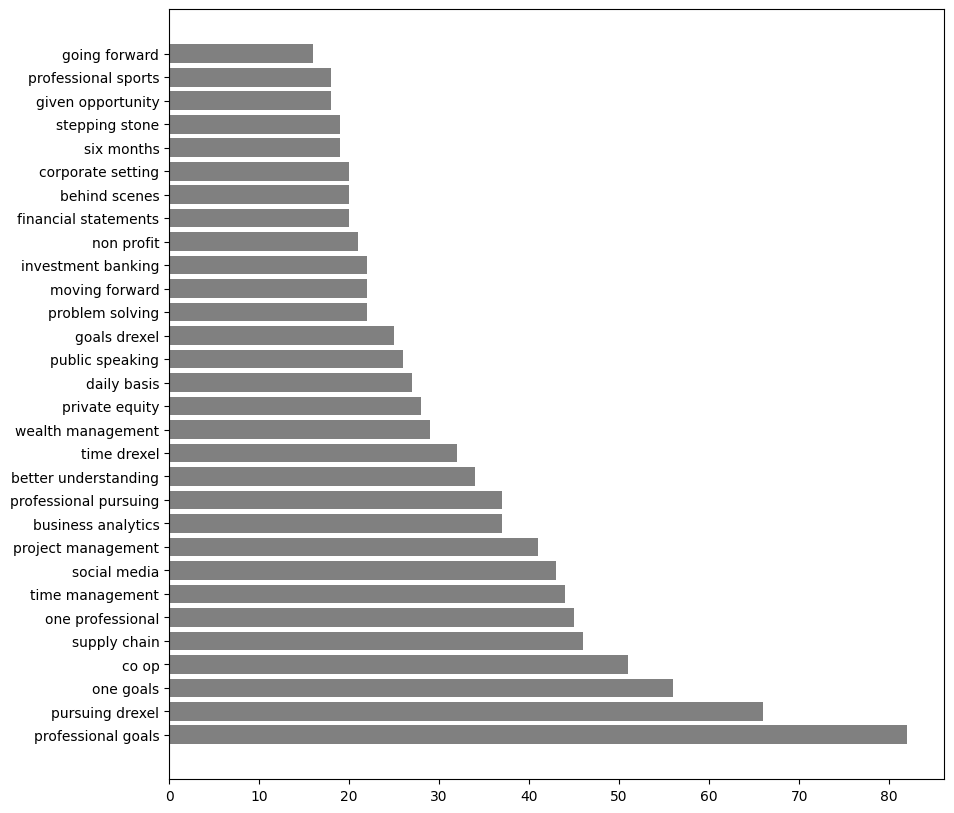

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
plt.barh(range(len(word_freqs_2)), word_freqs_2.values(),color='gray')

plt.yticks(range(len(word_freqs_2)), word_freqs_2.keys())
plt.yticks(rotation = 0)
plt.show()

In [92]:
!pip install wordcloud


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\vishn\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


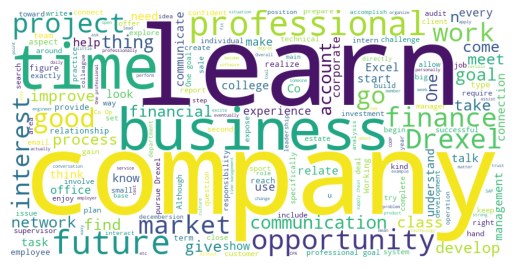

In [93]:
from wordcloud import WordCloud
str_cleaned_tokens = " ".join(Goal_string_tokens) # the word cloud needs raw text as argument not list
wc = WordCloud(background_color="white", width= 800, height= 400).generate(str_cleaned_tokens)
plt.imshow(wc)
plt.axis("off");


In [95]:
def basic_clean(text):
  #A simple function to clean up the data. All the word that are not designated as a stop word is then lemmatized after encoding and basic regex parsing are performed.
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]



Text(0.5, 0, 'No. of Occurances')

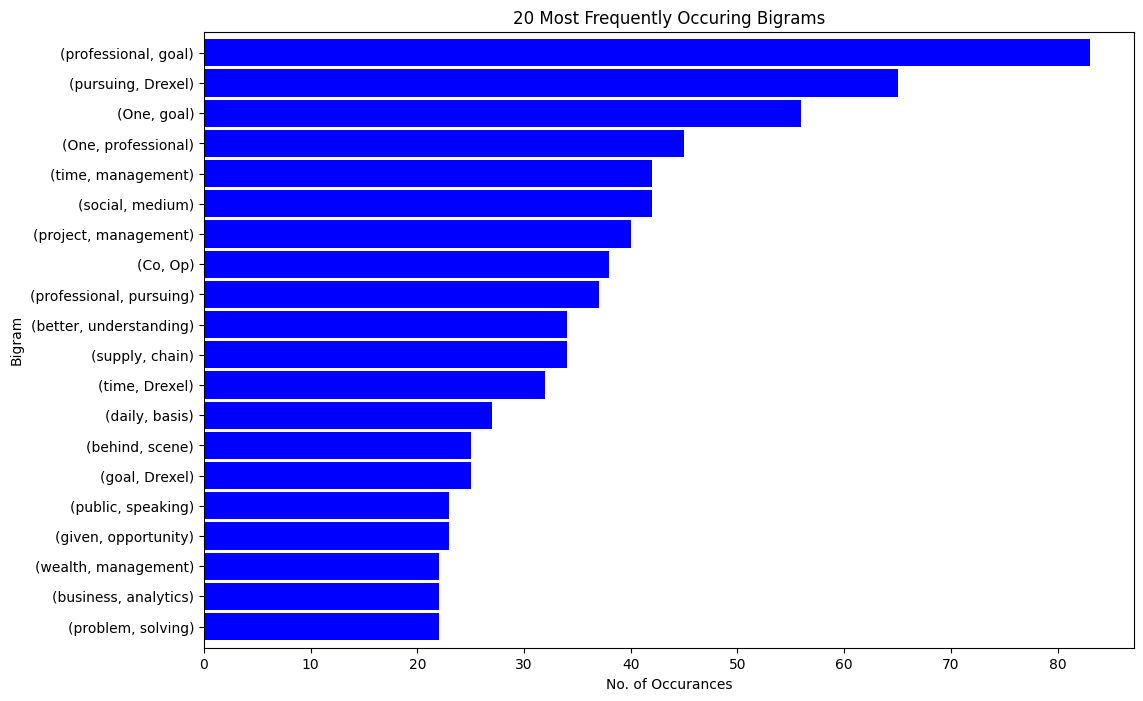

In [96]:
true_word = basic_clean(''.join(str(Data_Goals['My_Goals'].tolist())))
true_bigrams_series = (pd.Series(nltk.ngrams(true_word, 2)).value_counts())[:20]
true_bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
# Generate own list of words to be ignored
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('No. of Occurances') 

In [97]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


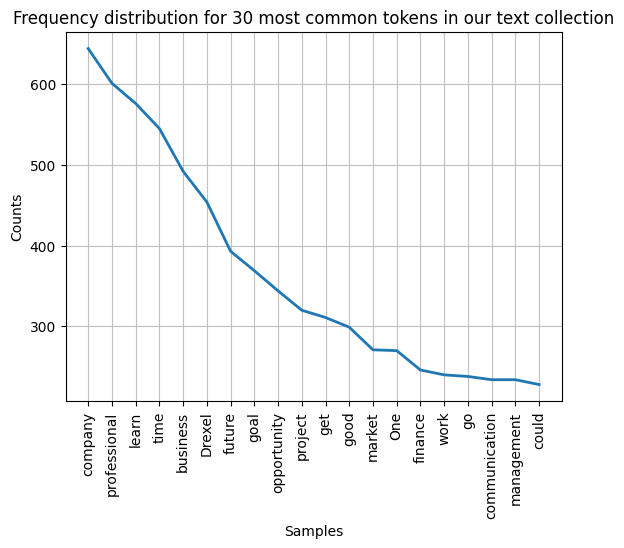

<Axes: title={'center': 'Frequency distribution for 30 most common tokens in our text collection'}, xlabel='Samples', ylabel='Counts'>

In [98]:
from nltk.text import FreqDist
nltk.download('stopwords')
from nltk.corpus import stopwords
remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits))
filtered_text = [w for w in Goal_string_tokens if not w in remove_these]
fdist_filtered = FreqDist(filtered_text)
fdist_filtered.plot(20,title='Frequency distribution for 30 most common tokens in our text collection')

In [99]:
#filtered the data as per first Co-op
Data_filter1= Data_Goals.loc[Data_Goals['Co-op'] == 'First']
Data_filter1

,Responder_ID,Quarter_Work,College,Major,Cops,Class,Citizenship_Status,Co-op,Co-op_Goals,My_Goals
4,3584,Fall/Winter,B,INT2,5COP,SR,Domestic,First,never expected job forensic accounting/financi...,forensic accounting financial investigations c...
8,42,Spring/Summer,B,FIN,5COP,PJ,Domestic,First,co-op experience related personal goal showed ...,related showed ropes finance non profit compan...
9,43,Spring/Summer,B,FIN,5COP,SR,Domestic,First,able work team see communication vital getting...,communication vital getting done eye opening a...
17,56,Spring/Summer,B,SPBS,5COP,PJ,Domestic,First,personal goal mine teamwork team player . Play...,teamwork player Playing sports growing college...
41,3653,Fall/Winter,B,INT1,5COP,JR,Domestic,First,n't .,n
...,...,...,...,...,...,...,...,...,...,...
1336,3541,Spring/Summer,BE,ECON,5COP,JR,International,First,"big part co-op experience research , included ...",included thinking companies target finding com...
1337,3548,Spring/Summer,B,FIN,5COP,SO,Domestic,First,eventually would like work fund analyst eventu...,eventually fund analyst eventually portfolio a...
1338,3550,Spring/Summer,B,LGST,5COP,JR,Domestic,First,allowed look subject nonprofit law laws also t...,subject nonprofit touched estate showed varyin...
1340,3563,Spring/Summer,BE,ECON,5COP,JR,Domestic,First,"great question feel like personal , academic ,...",question professional goals blend melting pot ...


In [100]:
Data_filter1['My_Goals']
Data_filter1['My_Goals'].replace('co_op','')

4       forensic accounting financial investigations c...
8       related showed ropes finance non profit compan...
9       communication vital getting done eye opening a...
17      teamwork player Playing sports growing college...
41                                                      n
                              ...                        
1336    included thinking companies target finding com...
1337    eventually fund analyst eventually portfolio a...
1338    subject nonprofit touched estate showed varyin...
1340    question professional goals blend melting pot ...
1341    aspects marcheting social media n Although thi...
Name: My_Goals, Length: 343, dtype: object

Text(0.5, 0, 'No. of Occurances')

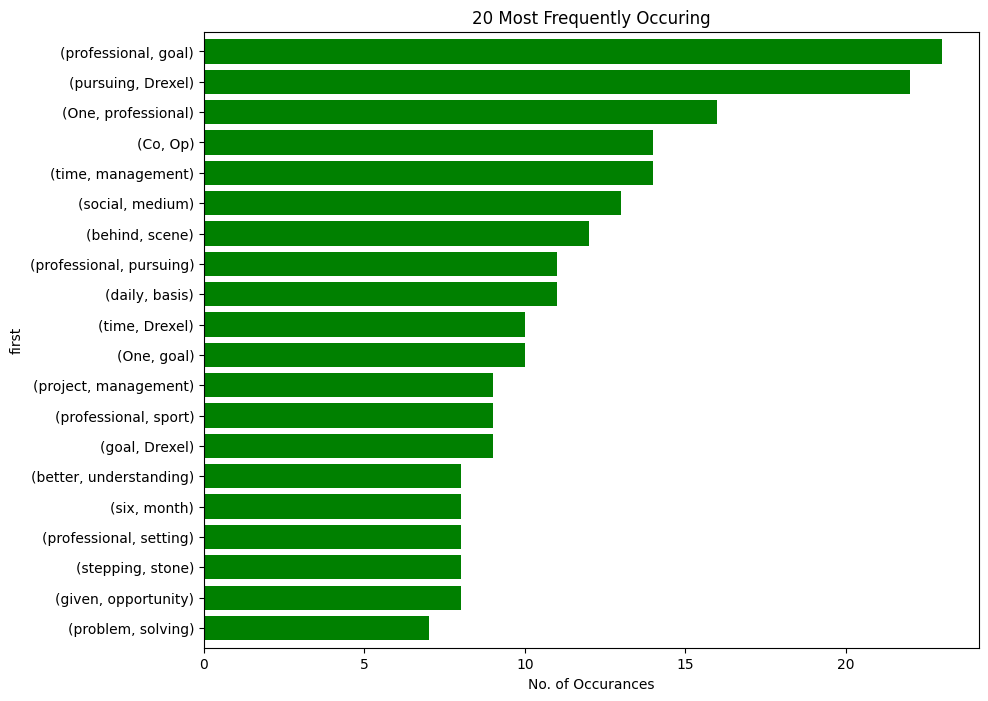

In [101]:
true_word1 = basic_clean(''.join(str(Data_filter1['My_Goals'].tolist())))
true_bigrams_series1 = (pd.Series(nltk.ngrams(true_word1, 2)).value_counts())[:20]
true_bigrams_series1.sort_values().plot.barh(color='Green', width=.8, figsize=(10, 8))
plt.title('20 Most Frequently Occuring')
plt.ylabel('first')
plt.xlabel('No. of Occurances')

In [102]:
#filtered the data as per first Co-op
Data_filter2= Data_Goals.loc[Data_Goals['Co-op'] == 'Second']
Data_filter2

,Responder_ID,Quarter_Work,College,Major,Cops,Class,Citizenship_Status,Co-op,Co-op_Goals,My_Goals
2,3581,Fall/Winter,B,ACCT,5COP,SR,Domestic,Second,Although see working finance digital future ca...,Although finance digital future pick professio...
3,3583,Fall/Winter,B,FIN,5COP,JR,Domestic,Second,previous co-op told need speak learn take char...,charge background things handed proactive comm...
12,47,Spring/Summer,B,OSCM,5COP,SR,International,Second,graduated degree Supply Chain Management posit...,graduated degree Supply Chain Management Distr...
30,3632,Fall/Winter,B,FIN,5COP,SR,Domestic,Second,experience valuable . learned much financial w...,learned financial wealth managment estate plan...
33,3637,Fall/Winter,B,MKTG,5COP,SR,International,Second,"marketing major interested Digital Marketing ,...",marcheting interested Digital Marketing trying...
...,...,...,...,...,...,...,...,...,...,...
992,5210,Fall/Winter,B,MKTG,5COP,JR,Domestic,Second,goals post-graduation freelance contract work ...,goals post freelance contract content marcheti...
993,2639,Spring/Summer,B,FIN,5COP,JR,Domestic,Second,co-op JP Morgan amazing opportunity . gave fir...,JP Morgan amazing opportunity hand financial c...
994,2643,Spring/Summer,B,FIN,5COP,JR,Domestic,Second,personal goal becoming extremely wealthy . coo...,becoming wealthy business opposed someone else...
1002,5218,Fall/Winter,B,ACCT,5COP,SR,Domestic,Second,"'m fascinated new technology . coop , able use...",fascinated technology cloud based audit platfo...


In [103]:
Data_filter2['My_Goals']

2       Although finance digital future pick professio...
3       charge background things handed proactive comm...
12      graduated degree Supply Chain Management Distr...
30      learned financial wealth managment estate plan...
33      marcheting interested Digital Marketing trying...
                              ...                        
992     goals post freelance contract content marcheti...
993     JP Morgan amazing opportunity hand financial c...
994     becoming wealthy business opposed someone else...
1002    fascinated technology cloud based audit platfo...
1314    future atmosphere learning behind scene restau...
Name: My_Goals, Length: 469, dtype: object

Text(0.5, 0, 'No. of Occurances')

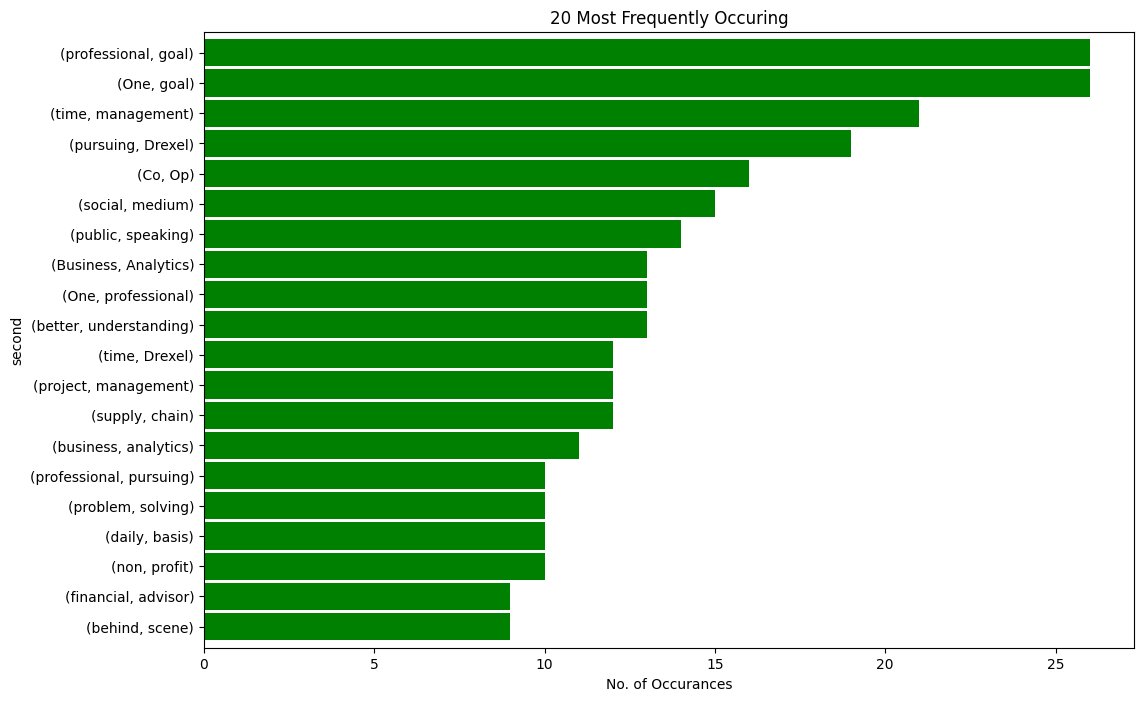

In [104]:
true_word2 = basic_clean(''.join(str(Data_filter2['My_Goals'].tolist())))
true_bigrams_series2 = (pd.Series(nltk.ngrams(true_word2, 2)).value_counts())[:20]
true_bigrams_series2.sort_values().plot.barh(color='Green', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring')
plt.ylabel('second')
plt.xlabel('No. of Occurances')

In [105]:
#filtered the data as per first Co-op
Data_filter3= Data_Goals.loc[Data_Goals['Co-op'] == 'Third']
Data_filter3

,Responder_ID,Quarter_Work,College,Major,Cops,Class,Citizenship_Status,Co-op,Co-op_Goals,My_Goals


In [109]:
#filtered the data as per first Co-op
Data_filter4= Data_Goals.loc[Data_Goals['Co-op'] == 'Only	']
Data_filter4

,Responder_ID,Quarter_Work,College,Major,Cops,Class,Citizenship_Status,Co-op,Co-op_Goals,My_Goals
